In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import datasets, optimizers, Input
from keras.models import Model, Sequential
from keras.layers import  MaxPooling2D, Flatten, Dropout, Conv2D, Dense
from keras.losses import SparseCategoricalCrossentropy
from keras.utils.vis_utils import plot_model
import keras.callbacks

In [ ]:
callbacks=myCallback()
image_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = image_data.load_data()
train_images, test_images = train_images / 255.0 , test_images / 255.0

In [ ]:
class_names = ['Trouser/Tops', 'Trousers', 'Pullovers', "Dress", "Coat", "Sandel", "Shirt", "Sneaker", "Bag", "Ankle Boots"]

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

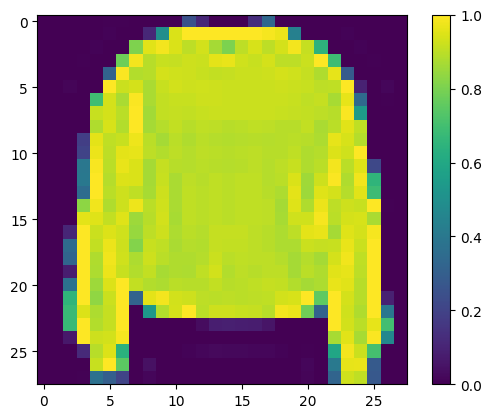

In [ ]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()

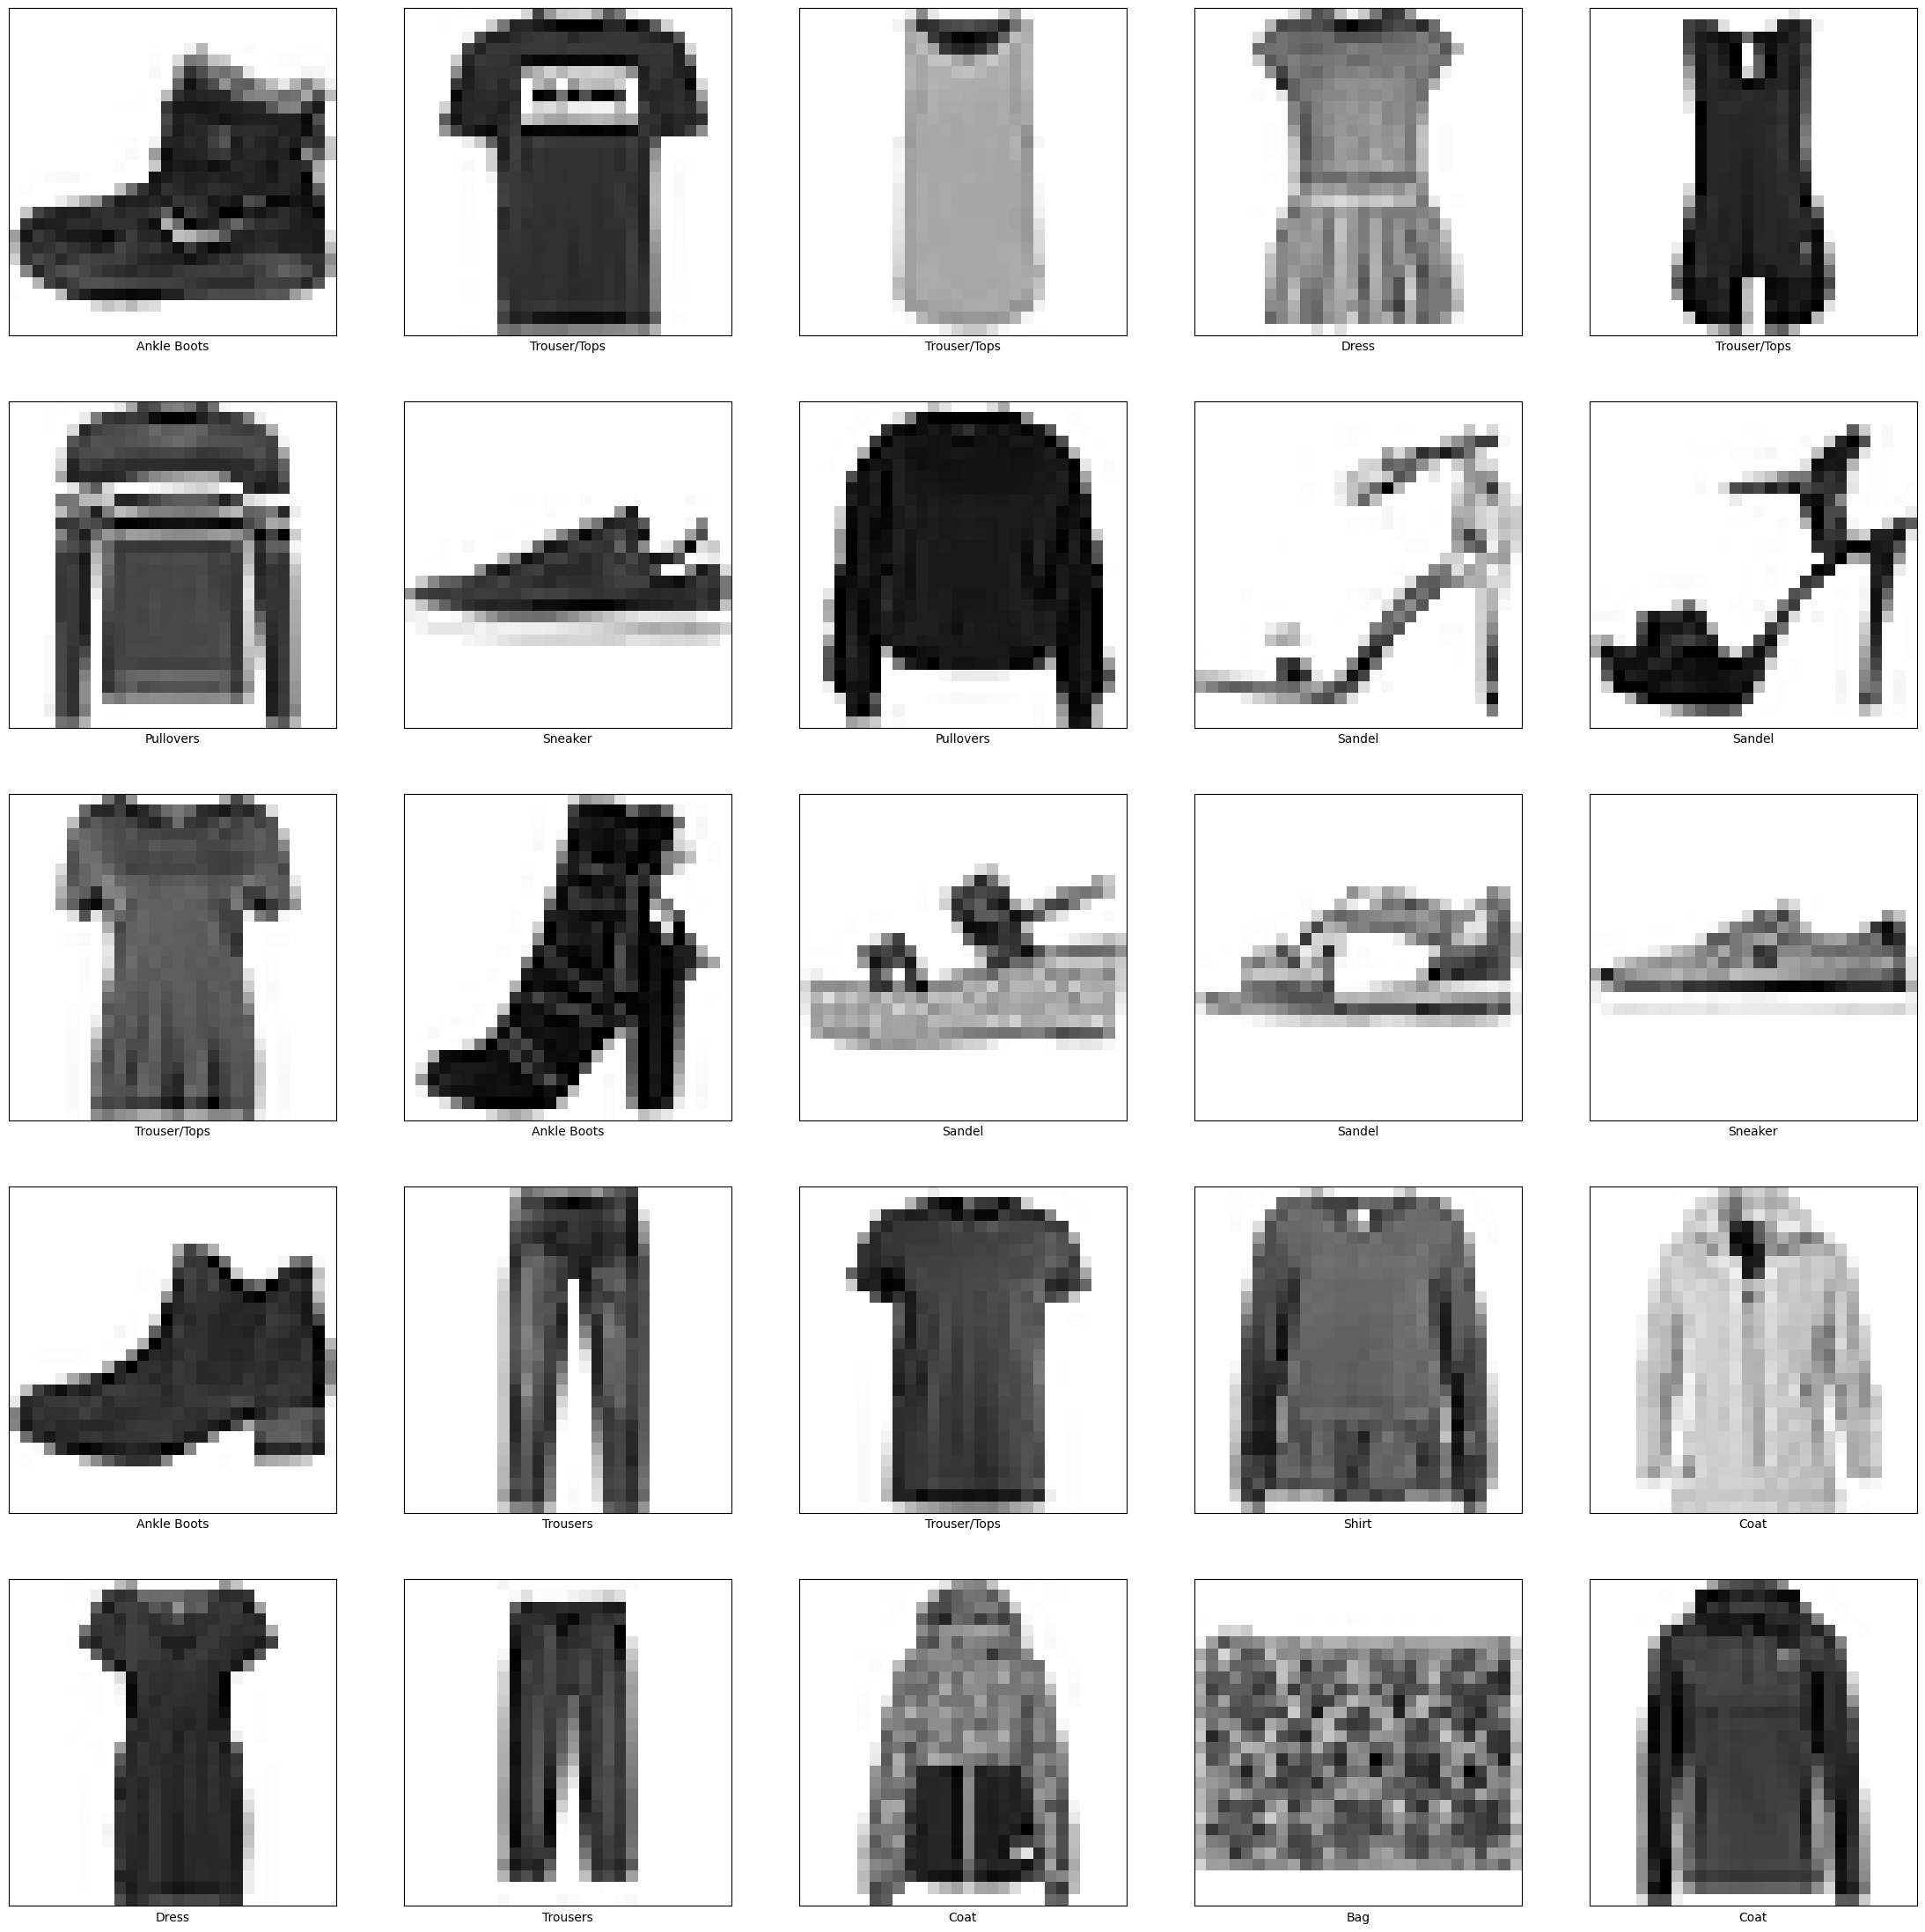

In [ ]:
plt.figure(figsize=(28,28))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
def model_with_sequential():
  seq_model = Sequential([
      Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(28,28,1)),
      MaxPooling2D(2,2),
      Conv2D(64, (3,3), activation=tf.nn.relu),
      Flatten(),
      Dense(512, activation=tf.nn.relu),
      Dropout(0.25),
      Dense(128, activation=tf.nn.relu),
      Dense(10, activation=tf.nn.softmax),
  ])

  return seq_model

In [ ]:
def model_with_functional():
  input_layer = Input(shape=(28,28,1))

  first_layer = Conv2D(64, (3,3), activation=tf.nn.relu)(input_layer)

  second_layer = MaxPooling2D(2,2)(first_layer)

  flatten_layer = Flatten()(second_layer)

  third_layer = Dense(512, activation=tf.nn.relu)(flatten_layer)

  forth_layer = Dense(128, activation=tf.nn.relu)(layer_dropout())

  fifth_layer = Dense(128, activation=tf.nn.relu)(layer_dropout())

  output_layer = Dense(10, activation=tf.nn.softmax)

  func_model = Model(inputs=input_layer, outputs=output_layer)

  return func_model

In [ ]:
def layer_dropout():

  dropout_layer = Dropout(0.25)


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if(logs.get('loss') < 0.004):
      print('n\ Loss is low training will be stopped!')
    self.model.stop_training=True

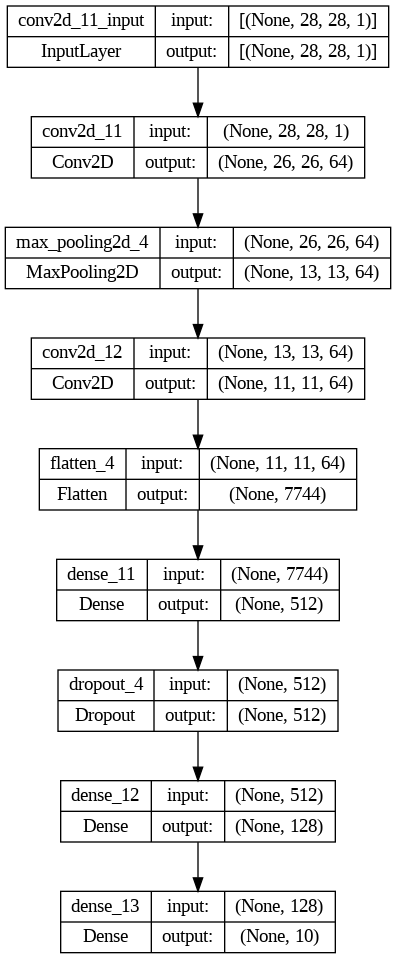

In [ ]:
model = model_with_sequential()

plot_model(model, show_shapes=True, show_layer_names=True, to_file='Model.png')

In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='my_Huber_loss',
    metrics=['accuracy']
)

In [ ]:
model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])
model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/10


ValueError: ignored